In [ ]:
# Tips (7-1)

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# for reproducibility
torch.manual_seed(1)

In [ ]:
# Training & Test Dataset
x_train = torch.FloatTensor([[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]])
y_train = torch.LongTensor([2,2,2,1,1,1,0,0])
x_test = torch.FloatTensor([[2,2,1],[3,1,2],[3,3,4]])
y_test = torch.LongTensor([2,2,2])

In [ ]:
# Model
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,3)
  def forward(self,x):
    return self.linear(x)
model = SoftmaxClassifierModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(),lr=0.1)

In [ ]:
# Train
def train(model,optimizer,x_train,y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):
    # H(x) 계산
    prediction = model(x_train)
    # cost 계산
    cost = F.cross_entropy(prediction, y_train)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

In [ ]:
# Test (Validation)
def test(model,optimizer,x_test,y_test):
  prediction = model(x_test)
  predicted_classes = prediction.max(1)[1]
  correct_count = (predicted_classes == y_test).sum().item()
  cost = F.cross_entropy(prediction, y_test)
  print('Accuracy: {}% Cost: {:.6f}'.format(
      correct_count / len(y_test) * 100, cost.item()
  ))

In [ ]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.280268
Epoch    1/20 Cost: 1.007498
Epoch    2/20 Cost: 0.999968
Epoch    3/20 Cost: 0.992704
Epoch    4/20 Cost: 0.985657
Epoch    5/20 Cost: 0.978815
Epoch    6/20 Cost: 0.972169
Epoch    7/20 Cost: 0.965708
Epoch    8/20 Cost: 0.959425
Epoch    9/20 Cost: 0.953312
Epoch   10/20 Cost: 0.947360
Epoch   11/20 Cost: 0.941562
Epoch   12/20 Cost: 0.935913
Epoch   13/20 Cost: 0.930405
Epoch   14/20 Cost: 0.925033
Epoch   15/20 Cost: 0.919792
Epoch   16/20 Cost: 0.914675
Epoch   17/20 Cost: 0.909678
Epoch   18/20 Cost: 0.904796
Epoch   19/20 Cost: 0.900025


In [ ]:
test(model, optimizer, x_test, y_test)

Accuracy: 100.0% Cost: 0.378607


In [ ]:
# 데이터 전처리 (Preprocessing)
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])
mu = x_train.mean(dim=0)
sigma = x_train.std(dim=0)
norm_x_train = (x_train - mu) / sigma
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [ ]:
# Training with Preprocessed Data
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)
  def forward(self,x):
    return self.linear(x)
model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(),lr=1e-1)
def train(model,optimizer,x_train,y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):
    # H(x) 계산
    prediction = model(x_train)
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

In [ ]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29476.849609
Epoch    1/20 Cost: 18718.511719
Epoch    2/20 Cost: 11937.442383
Epoch    3/20 Cost: 7627.894531
Epoch    4/20 Cost: 4878.606445
Epoch    5/20 Cost: 3121.619629
Epoch    6/20 Cost: 1997.883789
Epoch    7/20 Cost: 1278.898926
Epoch    8/20 Cost: 818.800293
Epoch    9/20 Cost: 524.344238
Epoch   10/20 Cost: 335.887390
Epoch   11/20 Cost: 215.266602
Epoch   12/20 Cost: 138.059769
Epoch   13/20 Cost: 88.637863
Epoch   14/20 Cost: 56.998798
Epoch   15/20 Cost: 36.740929
Epoch   16/20 Cost: 23.767536
Epoch   17/20 Cost: 15.456335
Epoch   18/20 Cost: 10.129311
Epoch   19/20 Cost: 6.712480


In [ ]:
# MNIST Introduction (7-2)

In [ ]:
# Softmax
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
# parameters
training_epochs = 15
batch_size = 100
# reading data
mnist_train = dsets.MNIST(root="MNIST_data/",train=True,transform=transforms.ToTensor(),download=True)
mnist_test = dsets.MNIST(root="MNIST_data/",train=False,transform=transforms.ToTensor(),download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True,drop_last=True)
# MNIST data image of shape 28x28=784
linear=torch.nn.Linear(784,10,bias=True).to(device)
# define cost/Loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is internally computed
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)
  for X,Y in data_loader:
    # reshape input image into [batch_size by 784]
    # label is not one-hot encoded
    X = X.view(-1,28*28).to(device)
    Y = Y.to(device)
    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis,Y)
    cost.backward()
    optimizer.step()
    avg_cost += cost/total_batch
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch: 0001 cost = 0.534912407
Epoch: 0002 cost = 0.359308600
Epoch: 0003 cost = 0.331088215
Epoch: 0004 cost = 0.316574186
Epoch: 0005 cost = 0.307130307
Epoch: 0006 cost = 0.300207883
Epoch: 0007 cost = 0.294897288
Epoch: 0008 cost = 0.290830463
Epoch: 0009 cost = 0.287419587
Epoch: 0010 cost = 0.284589082
Epoch: 0011 cost = 0.281816185
Epoch: 0012 cost = 0.279919654
Epoch: 0013 cost = 0.277836859
Epoch: 0014 cost = 0.276022315
Epoch: 0015 cost = 0.274443179
Learning finished


In [ ]:
# Test
# Test the model using test sets
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)
  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction,1)==Y_test
  accuracy = correct_prediction.float().mean()
  print("Accuracy: ",accuracy.item())

Accuracy:  0.8867999911308289


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label:  7
Prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


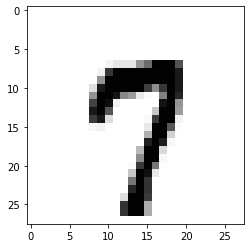

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import random
r = random.randint(0,len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)
print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())
plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap="Greys", interpolation="nearest")
plt.show()